<font color = "purple" size="13"><b>Decision Trees. With a Glass of Wine...</b></font>

<font face="Trebuchet MS" color="ba" size="6">We start by setting up...</font>

In [1]:
"#@title"
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, precision_recall_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine


In [ ]:
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
import seaborn as sns
import io
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#import xgboost as xgb
import warnings; #warnings.filterwarnings('ignore')
from scipy import sparse, stats




In [ ]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, RobustScaler, minmax_scale, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection


In [ ]:
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn import feature_selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
import time


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.api as sm
import statsmodels.formula.api as smf
random_state = 0


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#from IPython.display import display
#from IPython.core.display import display, HTML


In [ ]:
from google.colab import files; upload = files.upload()


Saving winequality-red.csv to winequality-red.csv


<font face="Trebuchet MS" color="purple" size="6">Then we grab all the data! </font>
<font face="Trebuchet MS" color="blue" size="5">...this is the biggest task, getting the data!</font>

In [ ]:
wine = load_wine()
df = pd.read_csv(io.StringIO(upload['filename.csv'].decode('utf-8')))


KeyError: ignored

or this...

In [ ]:
bottles = pd.read_csv(io.StringIO(upload['winequality-red.csv'].decode('utf-8')), delimiter=";")

<font face="Trebuchet MS" color="purple" size="6">Let's look at a few of the bottles in our data...!</font>
<font face="Trebuchet MS" color="blue" size="5">Each bottle shares 11 different wine characteristics that we'll use to predict how good a new bootle will taste</font>

In [ ]:
bottles.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


<font face="Trebuchet MS" color="purple" size="6">We spilt the data up, half to "train" and build our (machine learning) model, half to test how effective we are at predicting great wine! </font><font face="Trebuchet MS" color="blue" size="5"> We have the "answers" to how well the bottal is based on that quality column on the far right side. That will allow us to ... </font>

In [ ]:
bottle_features = bottles.iloc[:,0:-1].copy(); bottle_scores = bottles.iloc[:,-1].copy(); 
bottles_for_train, bottles_for_test, scores_for_train, scores_for_test = train_test_split(bottle_features, bottle_scores, random_state=0, train_size=0.8) 
feature_names = [str(x) for x in bottles.columns] 

<font face="Trebuchet MS" color="blue" size="6">Now we'll make sure the data is on a similar scale to iron out any wrinkles in the data so you don't have large swings. Its kinda look putting everything </font><font color=red>....maybe pull this</font>

In [ ]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

NameError: ignored

<font face="Trebuchet MS" color="purple" size="6">For dinner we'll select a bottle that's "good enough"</font><font face="Trebuchet MS" color="blue" size="5"> We'll go after anything having a quality of 7 or higher</font>

In [ ]:
#bin the data

<font face="Trebuchet MS" color="blue" size="6">Build and train your machine learning model, in this case a Decision Tree!</font><nbsp><nbsp><nbsp><font face="Trebuchet MS" color="black" size="4"><i>There are many different models from xx to NN </font>You can randomly combine them into a more powerful Random Forest or simplify and combine them into powerful Ensemble Booster</i>

Trees are nice to use b/c ...Even better is combining trees into random forest or use a boosting alogithm which combines simple trees

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bottle_features, bottle_scores, random_state=0, train_size=0.8) # random split and shuffle
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred = dtree.predict(X_test)
y_prob = dtree.predict_proba(X_test)

Ok, dont show this...

In [ ]:
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))
print("Accuracy on test set:",accuracy_score( y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy on training set: 1.000
Accuracy on test set: 0.694
Accuracy on test set: 0.69375
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.38      0.27      0.32        11
           5       0.76      0.76      0.76       135
           6       0.71      0.69      0.70       142
           7       0.54      0.70      0.61        27
           8       0.00      0.00      0.00         3

    accuracy                           0.69       320
   macro avg       0.40      0.40      0.40       320
weighted avg       0.69      0.69      0.69       320



In [ ]:
featureimpt = dtree.feature_importances_.copy()
featureimpt = featureimpt.reshape((featureimpt.shape[0],1))
features = np.array(feature_names)
features = features.reshape((features.shape[0],1))
featureimpt = np.append(featureimpt, features, axis=1)
featureimpt = np.sort(featureimpt, axis=0)
featureimpt[featureimpt[:,1].argsort()]
featurelist = featureimpt.copy()
#print("Feature importances:\n{}".format(dtree.feature_importances_))
#print(featureimpt)

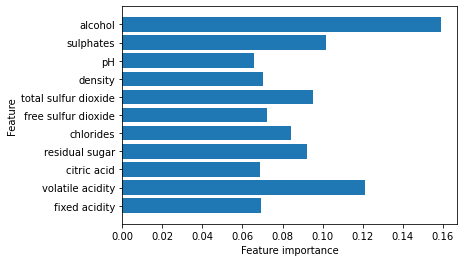

In [ ]:
def plot_feature_importance(model):
    n_features = bottle_features.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importance(dtree)

In [ ]:
feature_names = feature_names[:-1]
feature_names

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

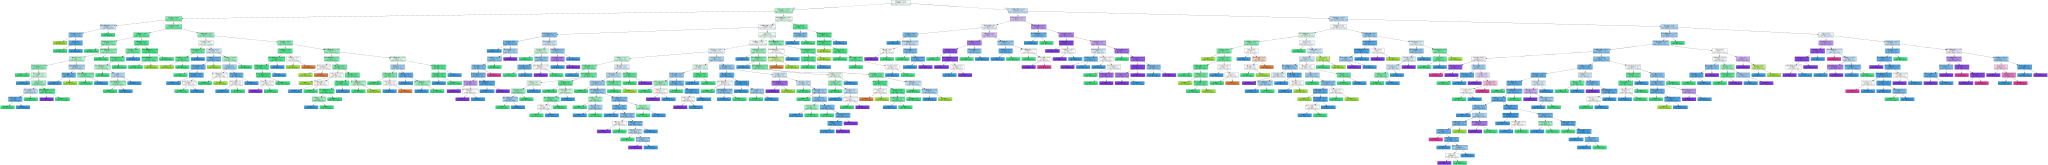

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(dtree, out_file="tree.dot",  feature_names=feature_names, impurity=False, filled=True)
with open("tree.dot") as f: dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
_ , ax = plt.subplots(figsize =(8, 8)); colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap( bottles.iloc[:,:5].corr(),  cmap = colormap, square=True,  cbar_kws={'shrink':.9 },ax=ax, annot=True,linewidths=0.1,vmax=1.0,linecolor='white', annot_kws={'fontsize':12 })
plt.title('Feature Correlation', y=1.05, size=15)

In [ ]:
sns.barplot(x = 'quality', y='volatile acidity', data = bottles)

In [ ]:
sns.boxplot(x=bottles["fixed acidity"], y=bottles["volatile acidity"])

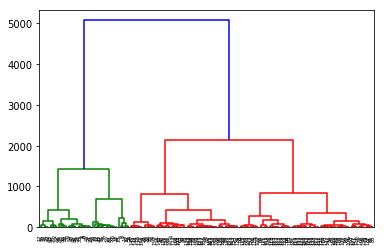

In [ ]:
from scipy.cluster.hierarchy import dendrogram, ward 
linkage_array = ward(wine.data) # Apply the ward clustering to the data array X which returns an array that specifies the distances bridged when performing agglomerative clustering
dendrogram_dict = dendrogram(linkage_array) # Now we plot the dendrogram for the linkage_array containing the distances between clusters

In [ ]:
pca = PCA(n_components=2, random_state=0)
X_reduced = pca.fit_transform(wine.data)

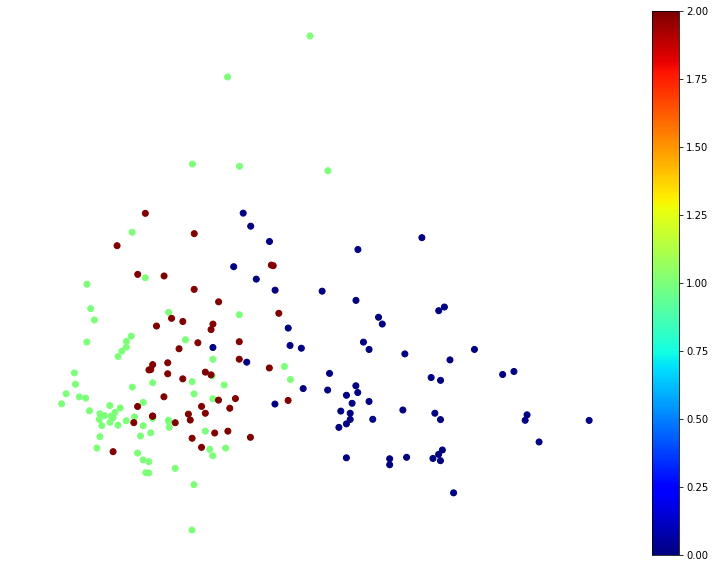

In [ ]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=wine.target, cmap="jet")
plt.axis('off')
plt.colorbar()

In [ ]:
bottles.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#dataset = data; targetset = target
dataset = wine.data; targetset = wine.target
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),   
    ensemble.BaggingClassifier(),    
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),        
    ensemble.RandomForestClassifier(max_depth=3), 
    xgb.XGBClassifier(),

    #Gaussian Processes
    #gaussian_process.GaussianProcessClassifier(), # long
    
    #Generalized Linear Models
    #linear_model.LogisticRegressionCV(), 
    #linear_model.PassiveAggressiveClassifier(), 
    #linear_model.RidgeClassifierCV(), 
    linear_model.SGDClassifier(), 
    linear_model.Perceptron(), 
    MLPClassifier(),                              

    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    KNeighborsClassifier(),                       
    
    #SVM takes a while...                       
    #svm.SVC(), 
    #svm.NuSVC(), 
    #svm.LinearSVC(),
    
    #Trees    
    DecisionTreeClassifier(),                   
    tree.ExtraTreeClassifier(), 
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(), 
    discriminant_analysis.QuadraticDiscriminantAnalysis() 

    ]

MLA_columns = ['Name', 'Parameters','Train F1','Test F1', 'Train Precision', 'Test Precision', \
               'Train Recall', 'Test Recall','Train Accuracy','Test Accuracy', 'Fit Time', 'Score Time','Model']

MLA_compare = pd.DataFrame(columns = MLA_columns)
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 ) 

#create table to compare MLA predictions
MLA_predict = ['0','1','2','3','4','5','6','7','8','9','10']
data1_x_bin = feature_names

#index through MLA and save performance to table

row_index = 0
for alg in MLA:

    t_start = time.time();
    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'Name'] = MLA_name
    MLA_compare.loc[row_index, 'Parameters'] = str(alg.get_params())
   
    cv_results = model_selection.cross_validate(alg, data, target, cv=cv_split, 
                                                scoring=('accuracy', 'recall_weighted', 'f1_weighted', 'precision_weighted'))
    #print (cv_results)
    MLA_compare.loc[row_index, 'Fit Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'Score Time'] = cv_results['score_time'].mean()
    MLA_compare.loc[row_index, 'Train F1'] = cv_results['train_f1_weighted'].mean()
    MLA_compare.loc[row_index, 'Test F1'] = cv_results['test_f1_weighted'].mean()   
    MLA_compare.loc[row_index, 'Train Precision'] = cv_results['train_precision_weighted'].mean()
    MLA_compare.loc[row_index, 'Test Precision'] = cv_results['test_precision_weighted'].mean()   
    MLA_compare.loc[row_index, 'Train Recall'] = cv_results['train_recall_weighted'].mean()
    MLA_compare.loc[row_index, 'Test Recall'] = cv_results['test_recall_weighted'].mean()   
    MLA_compare.loc[row_index, 'Train Accuracy'] = cv_results['train_accuracy'].mean()
    MLA_compare.loc[row_index, 'Test Accuracy'] = cv_results['test_accuracy'].mean()   
    #MLA_compare.loc[row_index, 'Test Accuracy (3stdev)'] = cv_results['test_score'].std()*3 # The worse case
   
    
    model = alg.fit(dataset, targetset)
    #MLA_predict = alg.predict(data)
    MLA_compare.loc[row_index, 'Model'] = model

    row_index+=1
    t_end = time.time(); 
    print (str(row_index)+")", MLA_name,"(",round((t_end-t_start)/60,3),"min's)...", end="") # Track progress...
    #print(classification_report(targetset,MLA_predict))

1) AdaBoostClassifier ( 0.035 min's)...2) BaggingClassifier ( 0.013 min's)...3) ExtraTreesClassifier ( 0.01 min's)...4) GradientBoostingClassifier ( 0.146 min's)...5) RandomForestClassifier ( 0.006 min's)...6) XGBClassifier ( 0.109 min's)...7) SGDClassifier ( 0.002 min's)...8) Perceptron ( 0.002 min's)...9) MLPClassifier ( 0.045 min's)...10) BernoulliNB ( 0.001 min's)...11) GaussianNB ( 0.002 min's)...12) KNeighborsClassifier ( 0.007 min's)...13) DecisionTreeClassifier ( 0.003 min's)...14) ExtraTreeClassifier ( 0.002 min's)...15) LinearDiscriminantAnalysis ( 0.002 min's)...16) QuadraticDiscriminantAnalysis ( 0.003 min's)...

In [ ]:
MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)
MLA_compare

,Name,Parameters,Train F1,Test F1,Train Precision,Test Precision,Train Recall,Test Recall,Train Accuracy,Test Accuracy,Fit Time,Score Time,Model
2,ExtraTreesClassifier,"{'min_samples_split': 2, 'max_depth': None, 'w...",1,0.639583,1,0.63643,1,0.654167,1,0.654167,0.0267614,0.0119796,"(ExtraTreeClassifier(class_weight=None, criter..."
1,BaggingClassifier,"{'warm_start': False, 'bootstrap_features': Fa...",0.982282,0.639666,0.982535,0.638421,0.982395,0.6525,0.982395,0.6525,0.0569791,0.00852253,"(DecisionTreeClassifier(class_weight=None, cri..."
3,GradientBoostingClassifier,"{'subsample': 1.0, 'min_samples_split': 2, 'lo...",0.908,0.63984,0.909896,0.636535,0.907864,0.650208,0.907864,0.650208,0.787448,0.0196386,([DecisionTreeRegressor(criterion='friedman_ms...
5,XGBClassifier,"{'min_child_weight': 1, 'max_depth': 3, 'colsa...",0.821582,0.617617,0.829855,0.614017,0.823771,0.632708,0.823771,0.632708,0.552071,0.0242765,"XGBClassifier(base_score=0.5, colsample_byleve..."
14,LinearDiscriminantAnalysis,"{'tol': 0.0001, 'priors': None, 'solver': 'svd...",0.589753,0.583937,0.583881,0.580267,0.602502,0.59625,0.602502,0.59625,0.0029932,0.00266283,"LinearDiscriminantAnalysis(n_components=None, ..."
12,DecisionTreeClassifier,"{'min_samples_split': 2, 'max_depth': None, 's...",1,0.596889,1,0.601605,1,0.595208,1,0.595208,0.00884163,0.00290592,"DecisionTreeClassifier(class_weight=None, crit..."
4,RandomForestClassifier,"{'min_samples_split': 2, 'max_depth': 3, 'warm...",0.578318,0.550663,0.60177,0.559971,0.619124,0.590833,0.619124,0.590833,0.0166016,0.00732338,"(DecisionTreeClassifier(class_weight=None, cri..."
13,ExtraTreeClassifier,"{'min_samples_split': 2, 'max_depth': None, 's...",1,0.581481,1,0.58799,1,0.579792,1,0.579792,0.0024266,0.00312338,"ExtraTreeClassifier(class_weight=None, criteri..."
15,QuadraticDiscriminantAnalysis,"{'store_covariances': None, 'tol': 0.0001, 're...",0.615123,0.561448,0.621543,0.567889,0.614388,0.564375,0.614388,0.564375,0.00320113,0.00513339,"QuadraticDiscriminantAnalysis(priors=None, reg..."
8,MLPClassifier,"{'validation_fraction': 0.1, 'alpha': 0.0001, ...",0.509344,0.502609,0.544381,0.523039,0.553798,0.545,0.553798,0.545,0.256963,0.00436597,"MLPClassifier(activation='relu', alpha=0.0001,..."


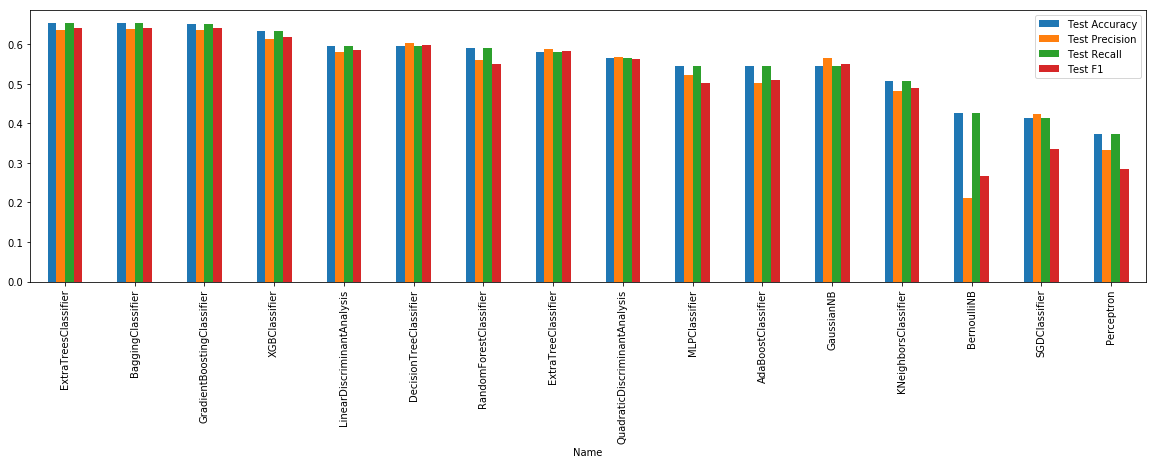

In [ ]:
MLA_compare.plot(figsize=(20,5), x="Name", y=['Test Accuracy','Test Precision','Test Recall', 'Test F1'], kind="bar")

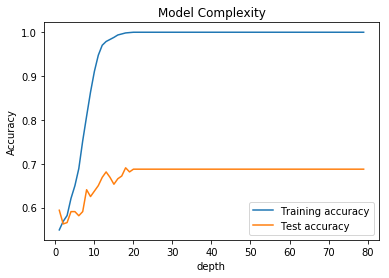

In [ ]:
training_accuracy = []
test_accuracy = []
depthlist = range(1,80)

for depth in depthlist:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
    test_accuracy.append(clf.score(X_test, y_test)) # record generalization accuracy

plt.plot(depthlist, training_accuracy, label="Training accuracy")
plt.plot(depthlist, test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy"); plt.xlabel("depth"); plt.title("Model Complexity")
plt.legend()

In [ ]:
param_grid = {'criterion':['gini','entropy'], 'max_depth':[3,4,5,6,7,8,9]} 
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)